In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the datasets
df = pd.read_csv("AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
#Removing unnecessary columns from the datasets
df.drop(["id","name","host_name","last_review"],axis=1,inplace=True)
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


In [4]:
#finding duplicates values
df.duplicated().sum()

0

In [5]:
#Finding missing values
df.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [7]:
#handling missing values
df.reviews_per_month.value_counts()

0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
10.23      1
8.94       1
6.04       1
9.21       1
10.67      1
Name: reviews_per_month, Length: 937, dtype: int64

# handling reviews_per_month column's missing values with room_type column's mode values

In [8]:
mode_of_room_type = df.pivot_table(values="reviews_per_month",columns="room_type",aggfunc=(lambda x:x.mean()))
mode_of_room_type

room_type,Entire home/apt,Private room,Shared room
reviews_per_month,1.306578,1.445209,1.471726


In [9]:
missing_values = df["reviews_per_month"].isnull()
missing_values

0        False
1        False
2         True
3        False
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: reviews_per_month, Length: 48895, dtype: bool

In [10]:
mode_of_room_type = df.pivot_table(values="reviews_per_month",columns="room_type",aggfunc=(lambda x:x.mean()))

missing_values = df["reviews_per_month"].isnull()

df.loc[missing_values,"reviews_per_month"] = df.loc[missing_values,"room_type"].apply(lambda x:mode_of_room_type[x])

In [11]:
#Finding missing values
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.445209,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.445209,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.445209,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.306578,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.471726,6,2


# Removing outlier of price column

<AxesSubplot:xlabel='price', ylabel='Count'>

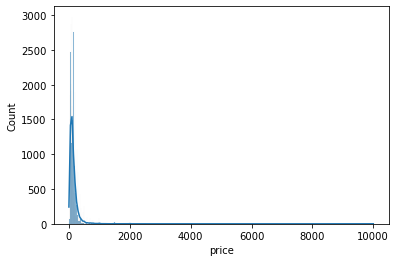

In [13]:
sns.histplot(df["price"],kde=True)

In [14]:
min_threshold,max_threshold = df.price.quantile([0.005,0.995])
min_threshold,max_threshold

(26.0, 1000.0)

In [15]:
df[df.price<min_threshold]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,1887999,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0.920000,1,226
2860,2196224,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,1.306578,4,137
3918,4973668,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1.220000,3,258
3950,12577771,Brooklyn,Bedford-Stuyvesant,40.68948,-73.93528,Private room,18,1,0,1.445209,1,0
4647,16477306,Manhattan,Upper East Side,40.76866,-73.95553,Entire home/apt,16,2,21,1.690000,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
48312,272247972,Bronx,Olinville,40.88116,-73.86547,Shared room,25,90,0,1.471726,1,190
48486,272872092,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1.000000,1,322
48832,267223765,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,1.471726,3,363
48867,261338177,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,1.471726,6,338


In [16]:
df[df.price>max_threshold]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
496,836168,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.330000,11,0
762,605463,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.310000,4,297
946,256239,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,1.445209,1,365
1105,2325861,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,1.445209,1,0
1480,836168,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,0.710000,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...
48080,203565865,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,1.306578,1,179
48304,270214015,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,1.306578,1,222
48305,272166348,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,1.306578,1,270
48523,217732163,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,1.306578,1,349


In [17]:
new_df = df[(df.price>min_threshold) & (df.price<max_threshold)]
new_df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.445209,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.445209,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.445209,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.306578,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.471726,6,2


In [18]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [20]:
#Drop this neighbourhood columns from the new_df
new_df.drop(["neighbourhood"],axis=1,inplace=True)
new_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,1.445209,1,365
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,40.67853,-73.94995,Private room,70,2,0,1.445209,2,9
48891,6570630,Brooklyn,40.70184,-73.93317,Private room,40,4,0,1.445209,2,36
48892,23492952,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1.306578,1,27
48893,30985759,Manhattan,40.75751,-73.99112,Shared room,55,1,0,1.471726,6,2


In [21]:
new_df.columns

Index(['host_id', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [22]:
#Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in new_df.columns:
    if new_df[column].dtype == np.number:
        continue
    new_df[column] = le.fit_transform(new_df[column])

<ipython-input-22-21c5fabdab62>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if new_df[column].dtype == np.number:
<ipython-input-22-21c5fabdab62>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = le.fit_transform(new_df[column])


In [23]:
new_df

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,1,40.64749,-73.97237,1,122,0,9,0.210000,5,365
1,3,2,40.75362,-73.98377,0,198,0,45,0.380000,1,355
2,13,2,40.80902,-73.94190,1,123,2,0,1.445209,0,365
3,14,1,40.68514,-73.95976,0,62,0,270,4.640000,0,194
4,18,2,40.79851,-73.94399,0,53,9,9,0.100000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,10186,1,40.67853,-73.94995,1,43,1,0,1.445209,1,9
48891,8880,1,40.70184,-73.93317,1,13,3,0,1.445209,1,36
48892,17349,2,40.81475,-73.94867,0,88,9,0,1.306578,0,27
48893,19595,2,40.75751,-73.99112,2,28,0,0,1.471726,5,2


In [24]:
#Extracting Independent and Dependent columns
x = new_df.drop(["price"],axis=1)
y = new_df["price"]

In [25]:
x

,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,1,40.64749,-73.97237,1,0,9,0.210000,5,365
1,3,2,40.75362,-73.98377,0,0,45,0.380000,1,355
2,13,2,40.80902,-73.94190,1,2,0,1.445209,0,365
3,14,1,40.68514,-73.95976,0,0,270,4.640000,0,194
4,18,2,40.79851,-73.94399,0,9,9,0.100000,0,0
...,...,...,...,...,...,...,...,...,...,...
48890,10186,1,40.67853,-73.94995,1,1,0,1.445209,1,9
48891,8880,1,40.70184,-73.93317,1,3,0,1.445209,1,36
48892,17349,2,40.81475,-73.94867,0,9,0,1.306578,0,27
48893,19595,2,40.75751,-73.99112,2,0,0,1.471726,5,2


In [26]:
y

0        122
1        198
2        123
3         62
4         53
        ... 
48890     43
48891     13
48892     88
48893     28
48894     63
Name: price, Length: 48344, dtype: int64

In [27]:
#Splitting the datasets into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [28]:
x_train.shape

(36258, 10)

In [29]:
x_test.shape

(12086, 10)

In [30]:
#training the model to linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [31]:
#Accuracy of the training datasets results
lin_reg.score(x_train,y_train)

0.3559588471218269

In [32]:
#Accuracy of the test datasets results
lin_reg.score(x_test,y_test)

0.36338150521300594

In [33]:
#training the model to RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
#Accuracy of the training datasets results
rfr.score(x_train,y_train)

0.9322204276144124

In [35]:
#Accuracy of the test datasets results
rfr.score(x_test,y_test)

0.51500750570034

In [36]:
#training the model to XGBRegressor model
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [37]:
#Accuracy of the training datasets results
xgb.score(x_train,y_train)

0.671439368894678

In [38]:
#Accuracy of the test datasets results
xgb.score(x_test,y_test)

0.5153845534450492